**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**Analyse Data**

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.duplicated('CustomerId').sum()

0

In [7]:
df = df.set_index('CustomerId')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding**

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df.replace({'Geography':{'France':1,'Spain':2,'Germany':3}},inplace=True)

In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [13]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [14]:
df.replace({'NumOfProducts':{1:0, 2:1, 3:1, 4:1}},inplace=True)

In [15]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [16]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [17]:
df.loc[(df['Balance']==0), 'Churn'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    1
15701354    0
15592531    0
15737173    0
15632264    0
           ..
15605622    0
15657105    0
15719294    0
15606229    0
15584532    1
Name: Churn, Length: 3617, dtype: int64>

In [18]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

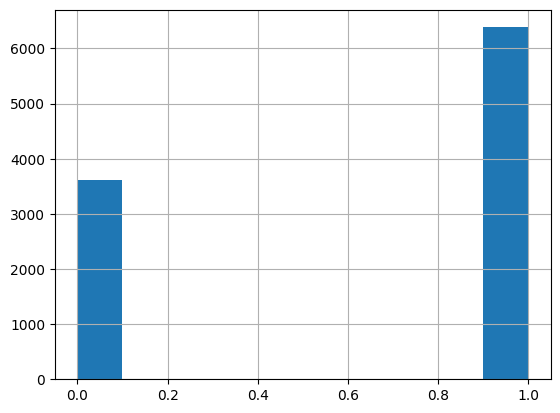

In [20]:
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     1             4204         4204    4204  4204    4204     4204   
      2             2064         2064    2064  2064    2064     2064   
      3             1695         1695    1695  1695    1695     1695   
1     1              810          810     810   810     810      810   
      2              413          413     413   413     413      413   
      3              814          814     814   814     814      814   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     1                     4204             4204              4204   
      2                     2064             2064              2064   
      3                     1695             1695              1695   
1     1                      810              810               810   
      2                      413              413               413   
      3                      814              814               814   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     1                      4204          4204  
      2                      2064          2064  
      3                      1695          1695  
1     1                       810           810  
      2                       413           413  
      3                       814           814

**Define Label and Features**

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:
X = df.drop(['Surname','Churn'], axis = 1)

In [24]:
y =df['Churn']

In [25]:
X.shape, y.shape

((10000, 11), (10000,))

**Random Under Sampling**

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus = RandomUnderSampler(random_state=2529)

In [28]:
X_rus, y_rus = rus.fit_resample(X,y)

In [29]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [30]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [31]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

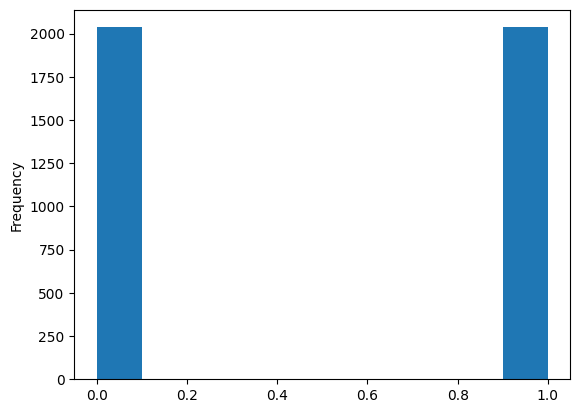

In [32]:
y_rus.plot(kind='hist')

**Random Over Sampling**

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=2529)

In [35]:
X_ros, y_ros = ros.fit_resample(X,y)

In [36]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [38]:
y.value_counts()

,count
Churn,
0,7963
1,2037


**Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

**Split Random Under Sample Data**

In [41]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

**Split Random Over Sample Data**

In [42]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

**Standardize Features**

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

**Standardize Original Data**

In [49]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [51]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


**Standardize Random Under Sample Data**

In [52]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [53]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standardize Random Over Sample Data**

In [55]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [56]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Support Vector Machine Classifier**

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()

In [59]:
svc.fit(X_train, y_train)

SVC()

In [60]:
y_pred = svc.predict(X_test)

**Model Accuracy**

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
confusion_matrix(y_test, y_pred)

array([[2376,   38],
       [ 402,  184]])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2414
           1       0.83      0.31      0.46       586

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.69      3000
weighted avg       0.85      0.85      0.83      3000



**Hyperparameter Tunning**

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid ={ 'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [66]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [67]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [68]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [70]:
grid_predictions = grid.predict(X_test)

In [71]:
confusion_matrix(y_test, grid_predictions)

array([[2109,  305],
       [ 269,  317]])

In [72]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2414
           1       0.51      0.54      0.52       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



**Model with Random Under Sampling**

In [73]:
svc_rus = SVC()

In [74]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [75]:
y_pred_rus = svc_rus.predict(X_test_rus)

**Model Accuracy**

In [76]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[497, 130],
       [171, 425]])

In [77]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       627
           1       0.77      0.71      0.74       596

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



**Hyperparameter Tunning**

In [78]:
param_grid ={ 'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [79]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [80]:
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [81]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [82]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [83]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[497, 130],
       [169, 427]])

In [84]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       627
           1       0.77      0.72      0.74       596

    accuracy                           0.76      1223
   macro avg       0.76      0.75      0.75      1223
weighted avg       0.76      0.76      0.76      1223



**Model with Random Over Sampling**

In [86]:
svc_ros = SVC()

In [87]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [88]:
y_pred_ros = svc_ros.predict(X_test_ros)

**Model Accuracy**

In [89]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1934,  445],
       [ 588, 1811]])

In [90]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2379
           1       0.80      0.75      0.78      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



**Hyperparameter Tunning**

In [91]:
param_grid ={ 'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf'], 'class_weight':['balanced']}

In [92]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)

In [93]:
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [94]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [95]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [96]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2067,  312],
       [  60, 2339]])

In [97]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2379
           1       0.88      0.97      0.93      2399

    accuracy                           0.92      4778
   macro avg       0.93      0.92      0.92      4778
weighted avg       0.93      0.92      0.92      4778



**Lets Compare**

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2414
           1       0.83      0.31      0.46       586

    accuracy                           0.85      3000
   macro avg       0.84      0.65      0.69      3000
weighted avg       0.85      0.85      0.83      3000



In [99]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2414
           1       0.51      0.54      0.52       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



In [100]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       627
           1       0.77      0.71      0.74       596

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



In [101]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       627
           1       0.77      0.72      0.74       596

    accuracy                           0.76      1223
   macro avg       0.76      0.75      0.75      1223
weighted avg       0.76      0.76      0.76      1223



In [102]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2379
           1       0.80      0.75      0.78      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [103]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2379
           1       0.88      0.97      0.93      2399

    accuracy                           0.92      4778
   macro avg       0.93      0.92      0.92      4778
weighted avg       0.93      0.92      0.92      4778

